In [51]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from PIL import Image
import io
import pickle

In [86]:
def object_id_hash(im, val=256, reverse=True):
    
    C = im.shape[-1]
    out = np.zeros(im.shape[:-1])
    for c in range(C):
        _c = (C - c - 1) if reverse else c
        out += im[...,c]*(256**_c)
        
    return out

In [212]:
ls /Users/db/neuroailab/trials/

stability_0/


top keys ['frames', 'static']
num frames: 208
frame data keys ['camera_matrices', 'collisions', 'env_collisions', 'images', 'objects']
image keys ['_depth', '_flow', '_id', '_img', '_normals']


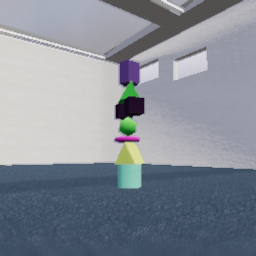

In [231]:
TDW_DIR = "/Users/db/neuroailab/trials/stability_2/"
FILE = "0000.hdf5"
view_frame = 0
f = h5py.File(os.path.join(TDW_DIR, FILE))

# print the data structure
print("top keys", [k for k in f.keys()])
frames = f['frames']
n_frames = len([k for k in frames.keys()])
print("num frames: {}".format(n_frames))
view_frame = np.minimum(view_frame, n_frames - 1)
frame = frames["%04d" % (view_frame)]
print("frame data keys", [k for k in frame.keys()])
img = frame['images']
print("image keys", [k for k in img.keys()])
_img = Image.open(io.BytesIO(img["_img"][:]))
_img

<IPython.core.display.Javascript object>


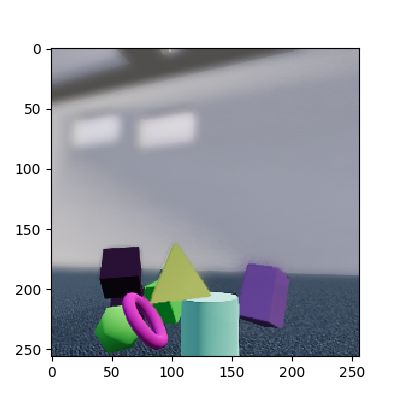

In [226]:
%matplotlib nbagg

def get_frame(f, idx, imkey='_img', N=n_frames):
    fkeys = sorted([k for k in f['frames'].keys()])
    img = f['frames'][fkeys[idx % N]]['images']
    return np.array(Image.open(io.BytesIO(img[imkey][:]))), len(fkeys)

idx = 0

fig, axes = plt.subplots(figsize=(4,4))
im = plt.imshow(get_frame(f, idx)[0], origin='upper')

def animate(*args):
    global idx
    
    fr, N = get_frame(f, idx)
    im.set_array(fr)
    idx += 1
    idx %= N
    
    return im,

ani = animation.FuncAnimation(fig, animate, interval=10)
plt.show()

# Parse Meta

['bounciness', 'color', 'dynamic_friction', 'mass', 'object_ids', 'scale', 'static_friction']
[2902027, 767192, 11190215, 4663035, 11092757, 5718751, 4914702]


<IPython.core.display.Javascript object>


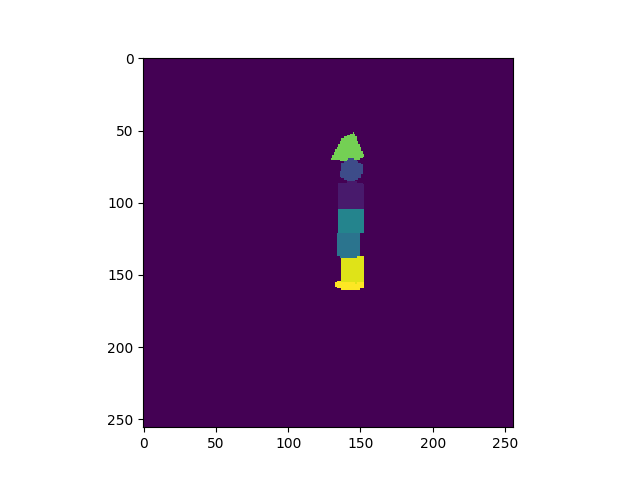

[       0.   852571.  2695222.  4499920.  5247046.  9228959. 11115918.
 11664959.]


In [217]:
skeys = [k for k in f['static'].keys()]
print(skeys)

obj_ids = [oid for oid in f['static']['object_ids']]
print(obj_ids)

segs = get_frame(f, 0, '_id')[0]
plt.imshow(segs)
plt.show()

objs = object_id_hash(segs, reverse=False)
print(np.unique(objs))
plt.imshow(objs)
plt.show()


In [218]:
[oid for oid in f['static']['object_ids']]

[2902027, 767192, 11190215, 4663035, 11092757, 5718751, 4914702]

In [219]:
key = 'color'
meta = f['static'][key]
print(np.array(meta))

[[0.42666503 0.8322449  0.97697616]
 [0.05878512 0.29860595 0.96790331]
 [0.56071732 0.85052666 0.59058397]
 [0.34693088 0.20576176 0.67415301]
 [0.01809298 0.20085301 0.32774071]
 [0.83769275 0.53433004 0.76795118]
 [0.25529123 0.33885158 0.11391291]]
